In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install chardet


In [3]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

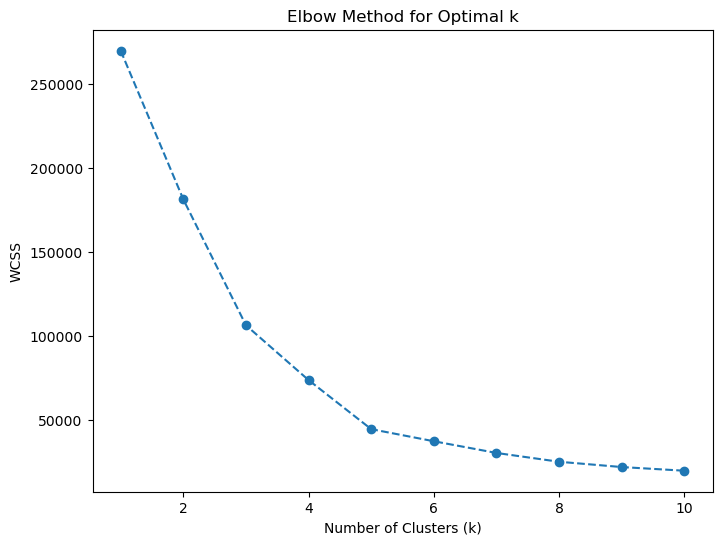

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters (k) using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


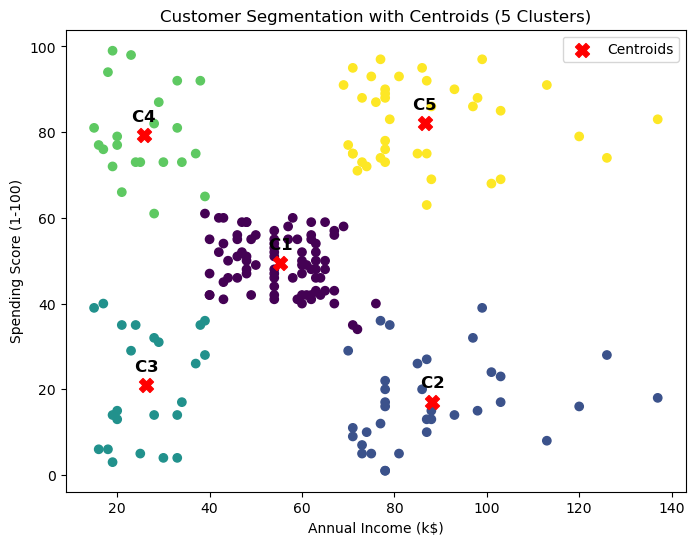

In [6]:
# Apply K-means with the chosen k
optimal_k = 5

# Apply K-means with the chosen k
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_final.fit(X)

# Add cluster labels to your original dataset
data['Cluster'] = kmeans_final.labels_

centroids = kmeans_final.cluster_centers_

# Visualize the clusters with centroids and labels
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

# Add cluster labels
for i, centroid in enumerate(centroids):
     plt.annotate(f'$\mathbf{{C{i+1}}}$', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, fontweight='bold')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with Centroids (5 Clusters)')
plt.legend()
plt.show()

Cluster C1 - Customers belonging to this cluster have average Annual Income and average Spending Score.
             They fall in the middle ground, neither overspending nor being too frugal.
             
Cluster C2 - Customers belonging to this cluster have high Annual Income and High Spending Score.
             They are high value customers.
             
Cluster C3 - Customers belonging to this cluster have low Annual Income and High Spending Score.
             They are likely enthusiastic spenders despite their limited income.
             
Cluster C4 - Customers belonging to this cluster have high Annual Income and low Spending Score.
             They are frugal despite their income level.
             
Cluster C5 - Customers belonging to this cluster have low Annual Income and low Spending Score.
             They are budget-conscious and spend minimally.